In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from datetime import datetime
from sklearn import preprocessing
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
%matplotlib inline

In [20]:
utah_df = pd.read_csv('Smaller_Claim_Medical_Header.csv', index_col=[0])

/Users/jessicahewitt/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [21]:
utah_df

,Claim_Type_Cd,Claim_Type_Desc,Admit_Type_Cd,Admit_Type_Desc,Admit_Source_Cd,Admit_Source_Desc,Discharge_Status_Cd,Discharge_Status_Desc,Bill_Type_Cd,Third_Party_Liability_Cd,...,Member_Age_Years,Length_of_Stay,ER_Flag,Line_Count,Deductible_Amt,Dental_Flag,Service_Start_Year,Small_Area_Cd,Gender_Cd,Member_Gender_Desc
Claim_ID,,,,,,,,,,,,,,,,,,,,,
248134065,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,51,0.0,N,3,0.00,N,2016,4.0,F,Female
186070247,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,51,0.0,N,1,0.00,N,2016,60.0,M,Male
249716086,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,4,0.0,N,1,0.00,N,2016,13.0,M,Male
248618084,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,61,0.0,N,3,0.00,N,2016,34.1,M,Male
278512556,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,54,0.0,N,1,0.00,N,2016,26.0,F,Female
279908505,O,Outpatient,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,131,1,...,58,0.0,N,5,0.00,N,2016,57.0,F,Female
279949652,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,5,0.0,N,1,0.00,N,2016,9.0,M,Male
249303559,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,45,0.0,N,1,0.00,N,2016,57.0,F,Female
281084958,P,Professional,9,INFORMATION NOT AVAILABLE,9,Information Not Available,0,Unknown,UK,1,...,25,0.0,N,1,0.00,N,2016,39.0,F,Female


In [4]:
len(utah_df.columns)

34

In [18]:
list(utah_df.columns.values)

['Claim_ID',
 'Claim_Type_Cd',
 'Claim_Type_Desc',
 'Admit_Type_Cd',
 'Admit_Type_Desc',
 'Admit_Source_Cd',
 'Admit_Source_Desc',
 'Discharge_Status_Cd',
 'Discharge_Status_Desc',
 'Bill_Type_Cd',
 'Third_Party_Liability_Cd',
 'Third_Party_Liability_Desc',
 'E_Cd',
 'Service_Start_Dt',
 'Charge_Amt',
 'Plan_Paid_Amt',
 'Prepaid_Amt',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Line_of_Business_Cd',
 'Capitation_Flag',
 'Admission_Dx_ID',
 'Principal_Dx_ID',
 'Primary_Proc_ID',
 'Member_Age_Years',
 'Length_of_Stay',
 'ER_Flag',
 'Line_Count',
 'Deductible_Amt',
 'Dental_Flag',
 'Service_Start_Year',
 'Small_Area_Cd',
 'Gender_Cd',
 'Member_Gender_Desc']

In [5]:
utah_df['Claim_Type_Cd'].nunique()

3

In [6]:
utah_df['Admission_Dx_ID'].nunique()

2945

In [7]:
utah_df['Bill_Type_Cd'].nunique()

61

In [9]:
#Get rid of nonnumeric or descriptive columns 
utah_df1 = utah_df.drop(['Dental_Flag', 'Service_Start_Year', 'Third_Party_Liability_Desc', 'Member_Gender_Desc', 'Discharge_Status_Desc', 'Admit_Source_Desc', 'Admit_Type_Desc', 'Claim_Type_Cd'], axis=1)
utah_df1

,Claim_ID,Claim_Type_Desc,Admit_Type_Cd,Admit_Source_Cd,Discharge_Status_Cd,Bill_Type_Cd,Third_Party_Liability_Cd,E_Cd,Service_Start_Dt,Charge_Amt,...,Admission_Dx_ID,Principal_Dx_ID,Primary_Proc_ID,Member_Age_Years,Length_of_Stay,ER_Flag,Line_Count,Deductible_Amt,Small_Area_Cd,Gender_Cd
0,248134065,Professional,9,9,0,UK,1,NaN,2016-02-23,320.00,...,9999999,3086,9999999,51,0.0,N,3,0.00,4.0,F
1,186070247,Professional,9,9,0,UK,1,NaN,2016-04-22,150.00,...,9999999,4775,9999999,51,0.0,N,1,0.00,60.0,M
2,249716086,Professional,9,9,0,UK,1,NaN,2016-12-19,141.39,...,9999999,9248,9999999,4,0.0,N,1,0.00,13.0,M
3,248618084,Professional,9,9,0,UK,1,NaN,2016-06-08,385.00,...,9999999,2789,9999999,61,0.0,N,3,0.00,34.1,M
4,278512556,Professional,9,9,0,UK,1,NaN,2016-02-02,60.00,...,9999999,9401,9999999,54,0.0,N,1,0.00,26.0,F
5,279908505,Outpatient,9,9,0,131,1,NaN,2016-04-27,392.00,...,9999999,21816,9999999,58,0.0,N,5,0.00,57.0,F
6,279949652,Professional,9,9,0,UK,1,NaN,2016-04-28,237.00,...,9999999,22496,9999999,5,0.0,N,1,0.00,9.0,M
7,249303559,Professional,9,9,0,UK,1,NaN,2016-10-11,61.25,...,9999999,17289,9999999,45,0.0,N,1,0.00,57.0,F
8,281084958,Professional,9,9,0,UK,1,NaN,2016-07-26,10.00,...,9999999,68912,9999999,25,0.0,N,1,0.00,39.0,F
9,238230063,Professional,9,9,0,UK,1,NaN,2016-04-04,473.00,...,9999999,20057,9999999,22,0.0,N,2,0.00,12.0,F


In [10]:
len(utah_df1.columns)

26

In [11]:
list(utah_df1.columns.values)

['Claim_ID',
 'Claim_Type_Desc',
 'Admit_Type_Cd',
 'Admit_Source_Cd',
 'Discharge_Status_Cd',
 'Bill_Type_Cd',
 'Third_Party_Liability_Cd',
 'E_Cd',
 'Service_Start_Dt',
 'Charge_Amt',
 'Plan_Paid_Amt',
 'Prepaid_Amt',
 'Copay_Amt',
 'Coinsurance_Amt',
 'Line_of_Business_Cd',
 'Capitation_Flag',
 'Admission_Dx_ID',
 'Principal_Dx_ID',
 'Primary_Proc_ID',
 'Member_Age_Years',
 'Length_of_Stay',
 'ER_Flag',
 'Line_Count',
 'Deductible_Amt',
 'Small_Area_Cd',
 'Gender_Cd']

In [17]:
utah_df1['Principal_Dx_ID']

0         3086
1         4775
2         9248
3         2789
4         9401
5        21816
6        22496
7        17289
8        68912
9        20057
10       68734
11        9250
12       13907
13       21373
14        4130
15       68768
16       21373
17        9246
18       68848
19        2931
20       17830
21       10659
22       21519
23       68646
24        9267
25       10711
26       18185
27       22529
28       68665
29       19830
         ...  
99969    21407
99970      734
99971      734
99972    36548
99973    21370
99974    21371
99975     4038
99976    10673
99977     9267
99978     1099
99979     8014
99980      734
99981     3430
99982    56665
99983     9275
99984    17741
99985    68732
99986     9267
99987     2549
99988    17538
99989    68918
99990     3679
99991    21726
99992     7443
99993    21349
99994     9267
99995    21726
99996    24776
99997    13153
99998    21415
Name: Principal_Dx_ID, Length: 99999, dtype: int64

In [13]:
utah_df1[['Claim_ID', 'Charge_Amt']]

,Claim_ID,Charge_Amt
0,248134065,320.00
1,186070247,150.00
2,249716086,141.39
3,248618084,385.00
4,278512556,60.00
5,279908505,392.00
6,279949652,237.00
7,249303559,61.25
8,281084958,10.00
9,238230063,473.00


In [22]:
utah_df2 = utah_df1.sort_values(by = ['Claim_ID'])
utah_df2

,Claim_ID,Claim_Type_Desc,Admit_Type_Cd,Admit_Source_Cd,Discharge_Status_Cd,Bill_Type_Cd,Third_Party_Liability_Cd,E_Cd,Service_Start_Dt,Charge_Amt,...,Admission_Dx_ID,Principal_Dx_ID,Primary_Proc_ID,Member_Age_Years,Length_of_Stay,ER_Flag,Line_Count,Deductible_Amt,Small_Area_Cd,Gender_Cd
3406,97169809,Outpatient,9,9,0,131,1,NaN,2016-01-25,170.20,...,9999999,68648,9999999,0,0.0,N,1,0.00,NaN,M
3408,97169818,Outpatient,9,9,0,131,1,NaN,2016-01-26,2000.00,...,9999999,3846,9999999,59,2.0,N,2,0.00,10.0,F
3409,97169822,Outpatient,9,9,0,131,2,NaN,2016-01-08,90.00,...,9999999,6483,9999999,83,0.0,N,1,90.00,18.0,F
3410,97169825,Outpatient,9,9,0,131,1,NaN,2016-01-31,1765.09,...,9999999,22286,9999999,27,0.0,Y,3,864.90,17.0,M
3411,97169826,Outpatient,9,9,0,131,1,NaN,2016-01-28,336.38,...,9999999,68732,9999999,55,0.0,N,2,0.00,3.0,F
3412,97169827,Outpatient,9,9,0,131,1,NaN,2016-01-06,391.41,...,9999999,4102,9999999,15,7.0,N,2,0.00,15.0,F
3413,97169837,Outpatient,9,9,0,131,1,NaN,2016-02-01,84.70,...,9999999,68909,9999999,25,0.0,N,3,0.00,17.0,F
3414,97169852,Outpatient,9,9,0,131,2,NaN,2016-01-24,18.13,...,9999999,21462,9999999,76,0.0,N,1,0.00,36.0,F
3415,97169853,Outpatient,9,9,0,131,1,NaN,2016-02-12,740.00,...,9999999,17506,9999999,25,0.0,N,8,0.00,NaN,M
3416,97169857,Outpatient,9,9,0,131,1,NaN,2016-01-28,160.75,...,9999999,21809,9999999,44,0.0,N,1,152.71,NaN,M


In [14]:
utah_df1.isnull().sum(axis = 0)

Claim_ID                        0
Claim_Type_Desc                 0
Admit_Type_Cd                   0
Admit_Source_Cd                 0
Discharge_Status_Cd             0
Bill_Type_Cd                    0
Third_Party_Liability_Cd        0
E_Cd                        95642
Service_Start_Dt                0
Charge_Amt                      0
Plan_Paid_Amt                   0
Prepaid_Amt                     0
Copay_Amt                       0
Coinsurance_Amt                 0
Line_of_Business_Cd             0
Capitation_Flag                 0
Admission_Dx_ID                 0
Principal_Dx_ID                 0
Primary_Proc_ID                 0
Member_Age_Years                0
Length_of_Stay                  0
ER_Flag                         0
Line_Count                      0
Deductible_Amt                  0
Small_Area_Cd                9934
Gender_Cd                       0
dtype: int64

Plot of Member Age Years- average. give names to axes
think about little things-> predict cost based on patient coming in

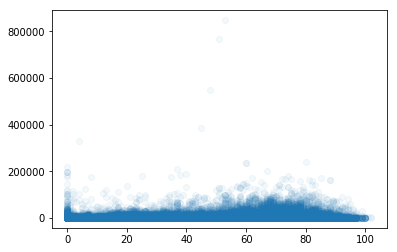

In [16]:
plt.scatter(utah_df1['Member_Age_Years'], utah_df1['Charge_Amt'], alpha=0.05)

In [50]:
X = pd.DataFrame(utah_df1['Principal_Dx_ID'])
y = pd.DataFrame(utah_df1['Charge_Amt'])

model = LinearRegression()
scores = []
kfold = KFold(n_splits=3, shuffle=True, random_state=42)
for i, (train, test) in enumerate(kfold.split(X, y)):
    model.fit(X.iloc[train,:], y.iloc[train,:])
    score = model.score(X.iloc[test,:], y.iloc[test,:])
    scores.append(score)

print(scores)

[1.2473486267761125e-05, 2.9184975774976252e-05, -3.717436535999319e-05]


In [23]:
utah_df1['Principal_Dx_ID']

0         3086
1         4775
2         9248
3         2789
4         9401
5        21816
6        22496
7        17289
8        68912
9        20057
10       68734
11        9250
12       13907
13       21373
14        4130
15       68768
16       21373
17        9246
18       68848
19        2931
20       17830
21       10659
22       21519
23       68646
24        9267
25       10711
26       18185
27       22529
28       68665
29       19830
         ...  
99969    21407
99970      734
99971      734
99972    36548
99973    21370
99974    21371
99975     4038
99976    10673
99977     9267
99978     1099
99979     8014
99980      734
99981     3430
99982    56665
99983     9275
99984    17741
99985    68732
99986     9267
99987     2549
99988    17538
99989    68918
99990     3679
99991    21726
99992     7443
99993    21349
99994     9267
99995    21726
99996    24776
99997    13153
99998    21415
Name: Principal_Dx_ID, Length: 99999, dtype: int64